Loading libraries and data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path1 = 'D:\ChurnRate\churn-bigml-80.csv'
file_path2 = 'D:\ChurnRate\churn-bigml-20.csv'

# Read csv to data frame
train_data = pd.read_csv(file_path1)
test_data = pd.read_csv(file_path2)

print(train_data.head())


<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:6: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:6: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Admin\AppData\Local\Temp\ipykernel_21380\1095519692.py:5: SyntaxWarning: invalid escape sequence '\C'
  file_path1 = 'D:\ChurnRate\churn-bigml-80.csv'
C:\Users\Admin\AppData\Local\Temp\ipykernel_21380\1095519692.py:6: SyntaxWarning: invalid escape sequence '\C'
  file_path2 = 'D:\ChurnRate\churn-bigml-20.csv'


  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

Preprocessing

In [3]:
#Change the data type
train_data['Churn']=train_data['Churn'].astype('int')
test_data['Churn']=test_data['Churn'].astype('int')

In [4]:
# Calculate missing values 
missing_values_ratio_train = train_data.isnull().mean()
missing_values_ratio_test = test_data.isnull().mean()

print(missing_values_ratio_train)
print(missing_values_ratio_test)

State                     0.0
Account length            0.0
Area code                 0.0
International plan        0.0
Voice mail plan           0.0
Number vmail messages     0.0
Total day minutes         0.0
Total day calls           0.0
Total day charge          0.0
Total eve minutes         0.0
Total eve calls           0.0
Total eve charge          0.0
Total night minutes       0.0
Total night calls         0.0
Total night charge        0.0
Total intl minutes        0.0
Total intl calls          0.0
Total intl charge         0.0
Customer service calls    0.0
Churn                     0.0
dtype: float64
State                     0.0
Account length            0.0
Area code                 0.0
International plan        0.0
Voice mail plan           0.0
Number vmail messages     0.0
Total day minutes         0.0
Total day calls           0.0
Total day charge          0.0
Total eve minutes         0.0
Total eve calls           0.0
Total eve charge          0.0
Total night minutes      

In [5]:
churn_percentage = train_data["Churn"].sum() * 100 / train_data["Churn"].shape[0]
print("Churn percentage is %.3f%%." % churn_percentage)

Churn percentage is 14.554%.


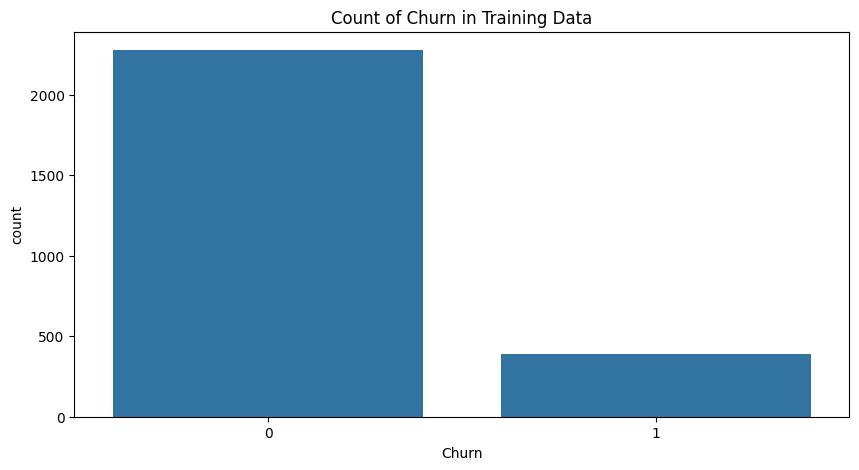

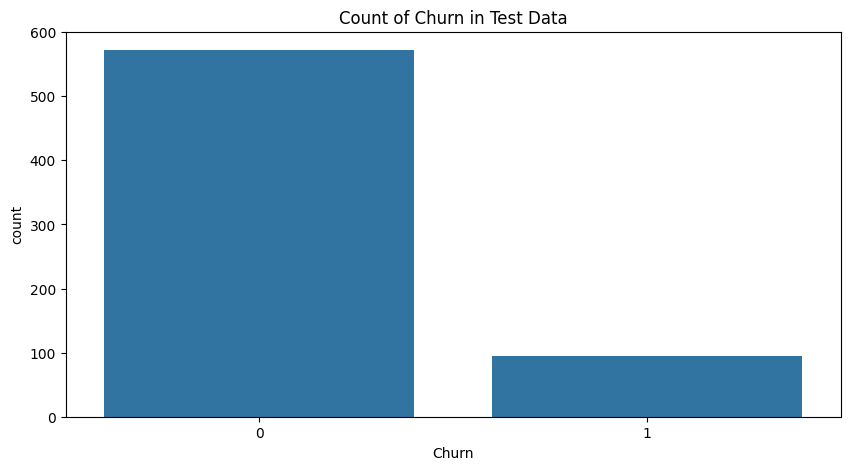

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Churn', data=train_data)
plt.title('Count of Churn in Training Data')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Churn', data=test_data)
plt.title('Count of Churn in Test Data')
plt.show()

In [7]:
## Create dummy variables 

def create_dummy_variables(data, columns_to_drop, columns):
    data = data.drop(columns=columns_to_drop)
    data_with_dummies = pd.get_dummies(data, columns=columns, drop_first=True)
    return data_with_dummies

columns_to_drop = ['State']

columns_for_dummies = ['International plan', 'Voice mail plan']

train_data_with_dummies = create_dummy_variables(train_data, columns_to_drop, columns_for_dummies)
test_data_with_dummies = create_dummy_variables(test_data, columns_to_drop, columns_for_dummies)


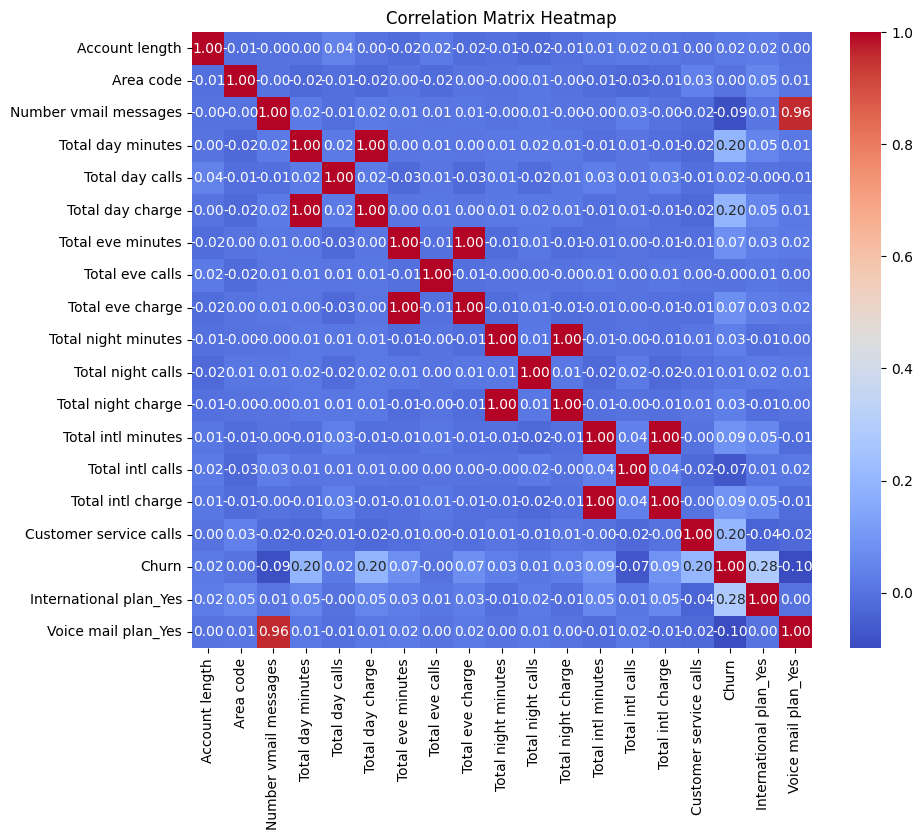

In [8]:
# Calculate the correlation matrix
correlation_matrix = train_data_with_dummies.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


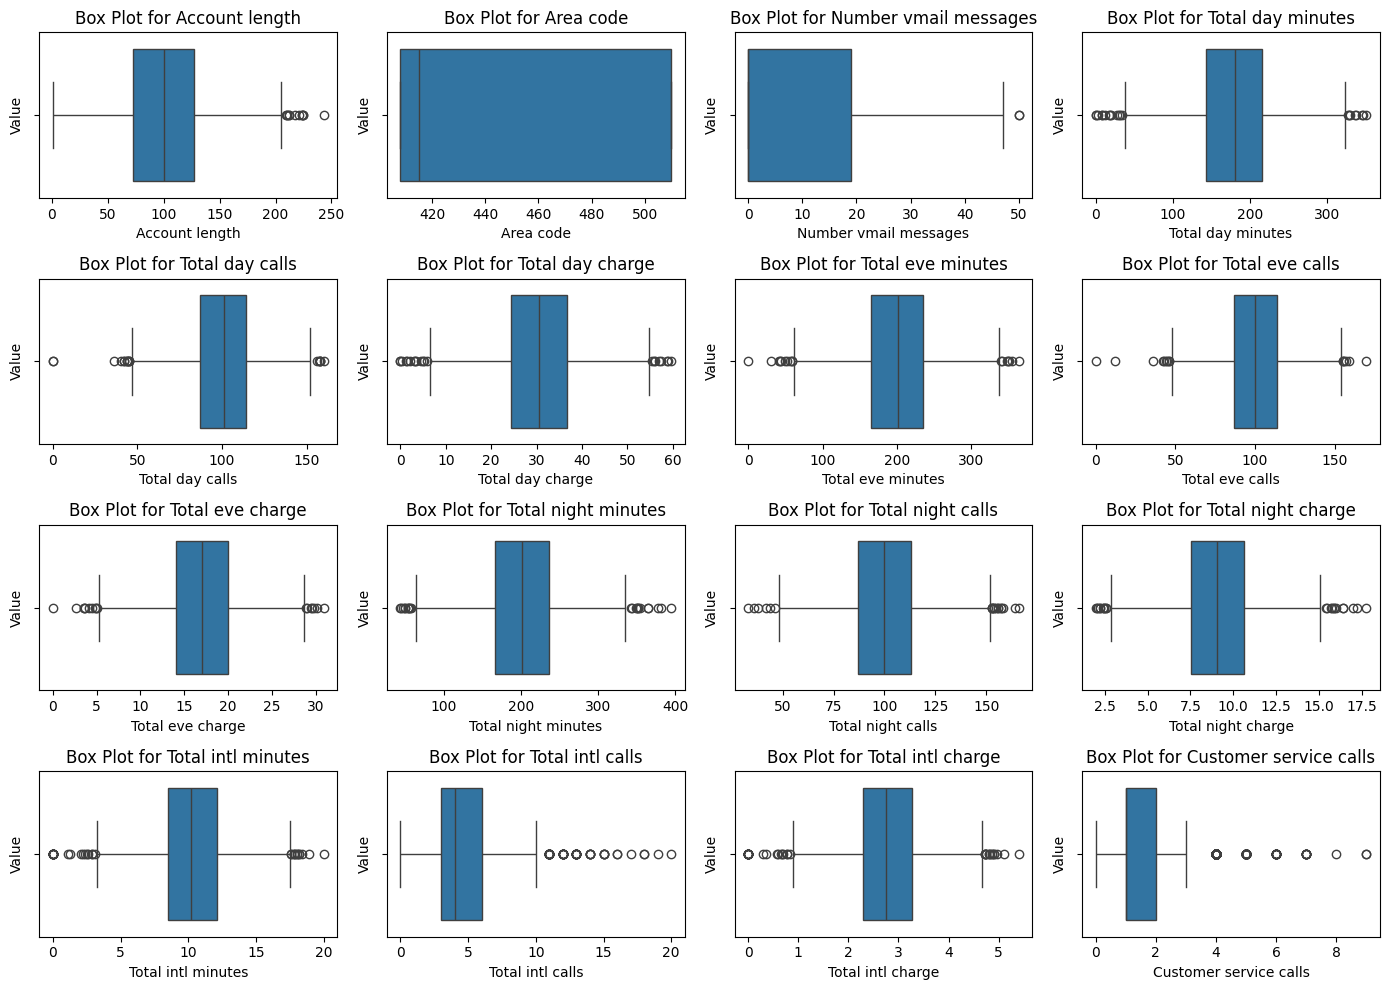

In [9]:
# Create a grid of box plots to check outliers
plt.figure(figsize=(14, 10))

# Define the number of rows and columns in the grid
rows = 4
cols = 4

# Limit the number of variables to be plotted to fit the grid layout
variables_to_plot = train_data_with_dummies.columns[:rows * cols]

# Loop through each variable and plot it in the grid
for i, column in enumerate(variables_to_plot):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=train_data_with_dummies[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Value')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [10]:
# Define a function to remove outliers using IQR method
def remove_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Define the features to remove outliers from
features_to_remove_outliers = ['Account length', 'Number vmail messages', 'Total day minutes', 
                               'Total day calls', 'Total day charge', 'Total eve minutes', 
                               'Total eve calls', 'Total eve charge', 'Total night minutes', 
                               'Total night calls', 'Total night charge', 'Total intl minutes', 
                               'Total intl calls', 'Total intl charge', 'Customer service calls']

# Remove outliers for each feature in train_data_with_dummies
for feature in features_to_remove_outliers:
    train_data_with_dummies = remove_outliers_iqr(train_data_with_dummies, feature)

# Remove outliers for each feature in test_data_with_dummies
for feature in features_to_remove_outliers:
    test_data_with_dummies = remove_outliers_iqr(test_data_with_dummies, feature)


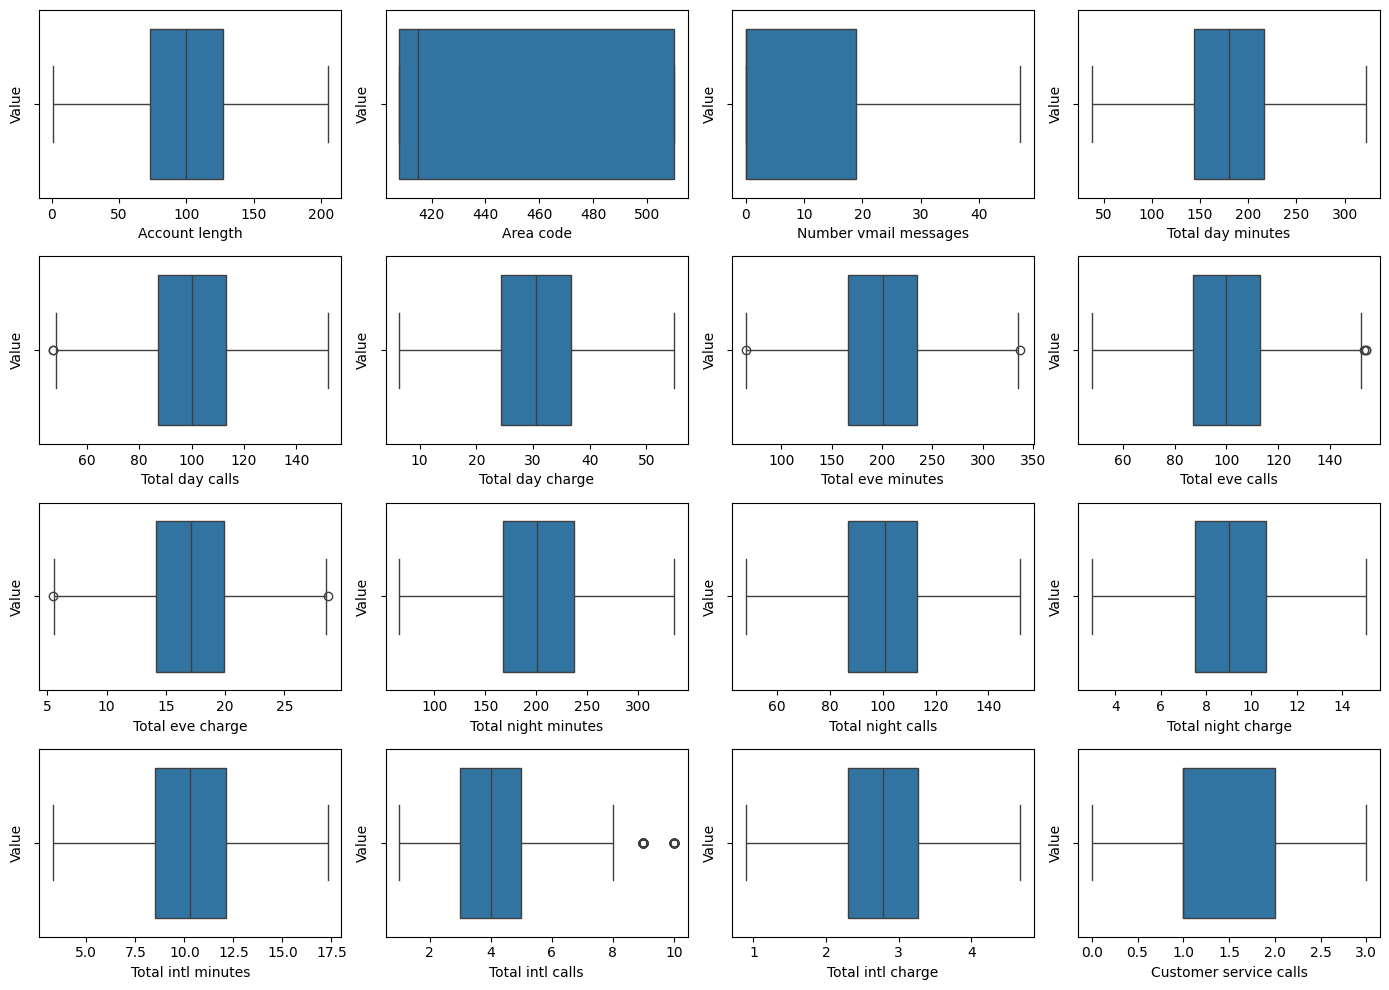

In [11]:
# Create a grid of box plots for every variable after removing outliers
plt.figure(figsize=(14, 10))

# Define the number of rows and columns in the grid
rows = 4
cols = 4

# Limit the number of variables to be plotted to fit the grid layout
variables_to_plot_train = train_data_with_dummies.columns[:rows * cols]
variables_to_plot_test = test_data_with_dummies.columns[:rows * cols]

# Loop through each variable and plot it in the grid for train data
for i, column in enumerate(variables_to_plot_train):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=train_data_with_dummies[column])
    # Remove the title
    plt.title('')
    plt.xlabel(column)
    plt.ylabel('Value')

# Adjust layout and show the plot for train data
plt.tight_layout()
plt.show()

Model building

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(train_data_with_dummies.drop(columns=['Churn']))
X_test_scaled = scaler.transform(test_data_with_dummies.drop(columns=['Churn']))
y_train = train_data_with_dummies['Churn']
y_test = test_data_with_dummies['Churn']

# Build Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_scaled, y_train)

# Build Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_lr = logistic_regression_model.predict(X_test_scaled)
y_pred_rf = random_forest_model.predict(X_test_scaled)

In [13]:
from sklearn.metrics import classification_report

# Evaluate Logistic Regression model
print("Classification Report for Logistic Regression model:")
print(classification_report(y_test, y_pred_lr))

# Evaluate Random Forest model
print("Classification Report for Random Forest model:")
print(classification_report(y_test, y_pred_rf))


Classification Report for Logistic Regression model:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       491
           1       0.68      0.27      0.39        55

    accuracy                           0.91       546
   macro avg       0.80      0.63      0.67       546
weighted avg       0.90      0.91      0.90       546

Classification Report for Random Forest model:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       491
           1       1.00      0.73      0.84        55

    accuracy                           0.97       546
   macro avg       0.99      0.86      0.91       546
weighted avg       0.97      0.97      0.97       546



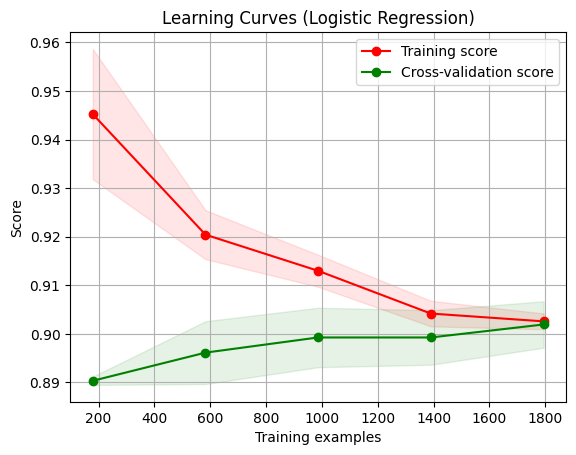

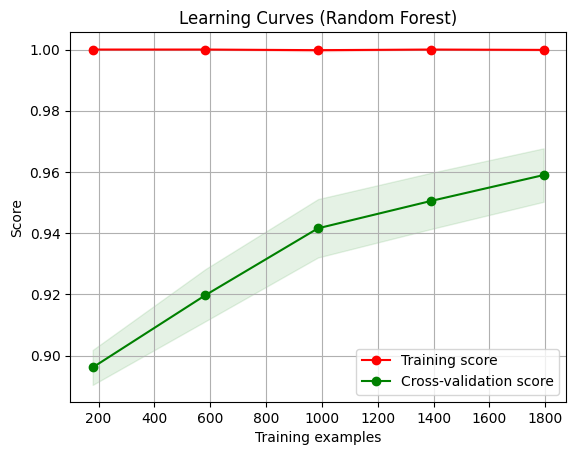

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves for Logistic Regression
plot_learning_curve(logistic_regression_model, "Learning Curves (Logistic Regression)", X_train_scaled, y_train, cv=5, n_jobs=-1)
plt.show()

# Plot learning curves for Random Forest
plot_learning_curve(random_forest_model, "Learning Curves (Random Forest)", X_train_scaled, y_train, cv=5, n_jobs=-1)
plt.show()
